In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples = 1000,n_features=2,random_state=3,centers=4)

In [3]:
y

array([1, 1, 2, 0, 1, 3, 3, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 3, 2, 1, 0, 1,
       0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 2, 2, 1, 0,
       1, 1, 3, 0, 0, 3, 3, 3, 2, 1, 2, 0, 2, 1, 2, 2, 2, 3, 3, 0, 0, 2,
       0, 2, 3, 1, 1, 1, 0, 3, 2, 1, 1, 3, 2, 2, 3, 0, 3, 0, 1, 2, 3, 1,
       0, 3, 1, 0, 3, 3, 3, 3, 1, 0, 3, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 3,
       1, 3, 2, 0, 3, 2, 1, 0, 1, 2, 1, 1, 3, 0, 0, 1, 1, 1, 3, 0, 3, 2,
       3, 1, 2, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 1,
       0, 3, 2, 3, 3, 0, 2, 3, 1, 0, 0, 2, 2, 1, 1, 3, 0, 2, 1, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 2, 3, 1, 1, 2, 0, 3, 2, 2, 3, 3, 2, 0, 3, 1, 1,
       1, 3, 2, 1, 0, 2, 1, 2, 3, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0,
       3, 3, 3, 2, 3, 0, 2, 1, 3, 0, 2, 3, 3, 2, 1, 2, 1, 2, 0, 2, 1, 3,
       1, 0, 2, 3, 0, 0, 3, 3, 0, 1, 0, 3, 2, 1, 1, 3, 2, 1, 3, 1, 3, 0,
       3, 0, 3, 0, 2, 0, 2, 3, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 3, 1,
       3, 3, 0, 0, 3, 0, 0, 1, 3, 2, 3, 2, 2, 3, 0,

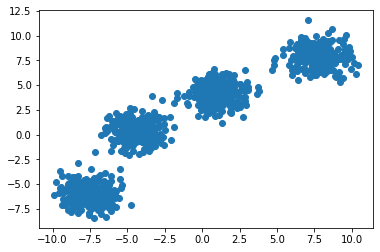

In [4]:
plt.scatter(X[:,0],X[:,1])


In [5]:
def dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
dist(np.array([1,2]),np.array([3,4]))

2.8284271247461903

In [6]:
k = 4
clusters = {}
colors = ["red","green","blue","orange"]
for i in range(k):
    cluster = {
        "color":colors[i],
        "points":[],
        "center":np.array([np.random.randint(-10,10)*np.random.random(),np.random.randint(-7.5,12.5)*np.random.random()])
    }
    clusters[i] = cluster

In [7]:
clusters

{0: {'color': 'red',
  'points': [],
  'center': array([-1.91512128, -1.8498164 ])},
 1: {'color': 'green',
  'points': [],
  'center': array([-1.66275251,  2.36967617])},
 2: {'color': 'blue',
  'points': [],
  'center': array([-0.32483727,  2.3826714 ])},
 3: {'color': 'orange',
  'points': [],
  'center': array([7.70688894, 7.90431492])}}

In [8]:
list_centers = []
def K_means(clusters,X,n):
    k = len(clusters)
    for i in range(n):
        centers = np.array([clusters[j]["center"] for j in range(k)])
        for x in X:
            p = []
            for c in centers:
                p.append(dist(c,x))
            min_ = np.argmin(p) #returns min dist
            clusters[min_]["points"].append(x) #append the value of point "x" in cluster"min_"'s points array
        list_centers.append(centers)
        update_center(clusters,k)

In [9]:
def update_center(clusters,m):
    for k in range(m):
        clusters[k]["center"] = np.mean(clusters[k]["points"],axis=0)

In [11]:
K_means(clusters,X,1000)

In [12]:
for i in range(k):
    clusters[i]["points"] = np.array(clusters[i]["points"])

In [13]:
#new cluster
clusters

{0: {'color': 'red', 'points': array([[-3.43086267, -1.36055926],
         [-5.78932127, -7.31455182],
         [-6.03604123, -7.05892193],
         ...,
         [-8.33299849, -5.95834949],
         [-8.05667924, -5.32411802],
         [-7.44536187, -5.90031803]]), 'center': array([-7.52673894, -5.95156156])},
 1: {'color': 'green', 'points': array([[-5.96616455,  1.41614415],
         [-5.25977461,  0.97491577],
         [-4.05461012,  2.41031526],
         ...,
         [-3.98765997,  0.17066074],
         [-4.4553593 , -0.13560022],
         [-2.62194538, -0.28652312]]), 'center': array([-4.32581339,  0.38766327])},
 2: {'color': 'blue', 'points': array([[0.42873774, 6.0737833 ],
         [2.43630036, 3.84336631],
         [1.98092382, 4.41917823],
         ...,
         [1.57790972, 3.86913521],
         [0.47638344, 2.69748436],
         [0.50482906, 4.04011305]]), 'center': array([1.02482119, 4.17575075])},
 3: {'color': 'orange', 'points': array([[8.28471755, 7.54456991],
     

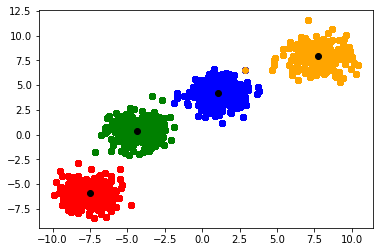

In [14]:
k = 4
c = np.array([clusters[j]["center"] for j in range(k)])
for i in range(k):
    plt.scatter(clusters[i]["points"][:,0],clusters[i]["points"][:,1],c=clusters[i]["color"])
plt.scatter(c[:,0],c[:,1],c="black")
plt.show()